In [31]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [ ]:
# importando os dados
dataset = pd.read_csv('../dados/Churn.csv', sep=';')
# visualizando os dados
dataset.head() ## Em pyton, o head() entre outras funcoes sao metodos, e nao funcoes

In [7]:
dataset.shape
## retorna as dimensoes do dataset (linhas, colunas)

(999, 12)

In [11]:
## Como identificado, o dataSet nao possui nomes de colunas, entao vamos renomear
dataset.columns = ['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo', 'Produtos', 'TemCartCredito', 'Ativo', 'Salario', 'Saiu']
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


<Axes: xlabel='Estado'>

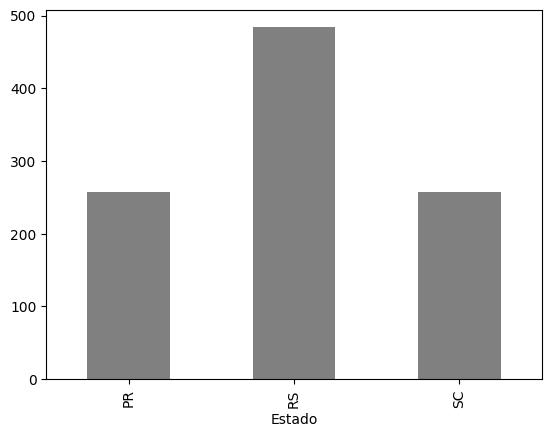

In [ ]:
## Agora, faremos a exploracao dos dados categoricos
agrupado = dataset.groupby(['Estado']).size()   ## agrupando por estado

## com a identificaco de estados aparentemente incorretos, vamos corrigir
## substituindo os estados errados pela moda (regra usada para dados categoricos)
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'
## funcao loc() permite localizar os dados que atendem a condicao passada
## isin() verifica se o valor esta contido na lista passada
## apos a condicao, passamos a coluna que queremos alterar e o valor que queremos atribuir
agrupado = dataset.groupby(['Estado']).size()
agrupado.plot.bar(color = 'gray')   

<Axes: xlabel='Genero'>

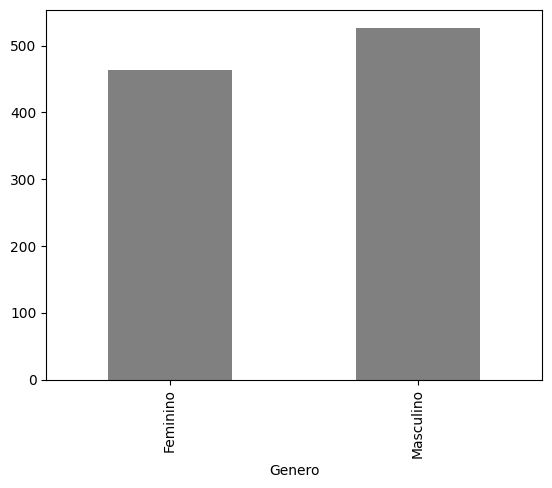

In [ ]:
agrupado = dataset.groupby(['Genero']).size()
agrupado.plot.bar(color = 'gray') ## analisando variavel categoria genero
#Encontramos um erro de digitacao, vamos corrigir
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'

agrupado.plot.bar(color = 'gray') ## Agora, a variavel genero esta corrigida com somente "Masculino" e "Feminino"

Text(0.5, 1.0, 'Score')

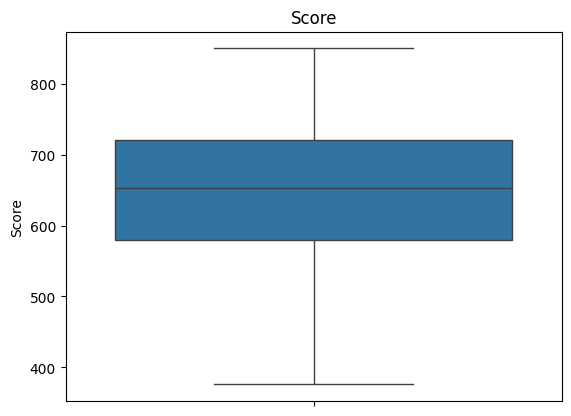

In [32]:
srn.boxplot(dataset['Score']).set_title('Score') ## analisando a variavel score